<a href="https://colab.research.google.com/github/james-hughes1/climate-news-NLP/blob/main/Twitter_COP_Conference_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-Amble

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
# Import Datasets

cop24_df = pd.read_csv("Twitter Scrape 4_Sentiment_Full.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Time', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Category', 'Negative Probability',
                                'Neutral Probability', 'Positive Probability'])
cop24_df.drop(list(cop24_df[cop24_df["Content"].isnull()].index), axis=0, inplace=True)
cop25_df = pd.read_csv("Twitter Scrape 3_Sentiment_Full.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Time', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Category', 'Negative Probability',
                                'Neutral Probability', 'Positive Probability'])
cop25_df.drop(list(cop25_df[cop25_df["Content"].isnull()].index), axis=0, inplace=True)
cop26_df = pd.read_csv("Twitter Scrape 2_Sentiment_Full.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Time', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Category', 'Negative Probability',
                                'Neutral Probability', 'Positive Probability'])
cop26_df.drop(list(cop26_df[cop26_df["Content"].isnull()].index), axis=0, inplace=True)
cop24_df.reset_index(inplace=True)
cop25_df.reset_index(inplace=True)
cop26_df.reset_index(inplace=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Configure Date and Time Columns

cop24_df["Time"] = pd.to_datetime(cop24_df["Time"], format="%H:%M:%S").dt.time
cop24_df["Date"] = pd.to_datetime(cop24_df["Date"], format="%Y-%m-%d").dt.date
cop25_df["Time"] = pd.to_datetime(cop25_df["Time"], format="%H:%M:%S").dt.time
cop25_df["Date"] = pd.to_datetime(cop25_df["Date"], format="%Y-%m-%d").dt.date
cop26_df["Time"] = pd.to_datetime(cop26_df["Time"], format="%H:%M:%S").dt.time
cop26_df["Date"] = pd.to_datetime(cop26_df["Date"], format="%Y-%m-%d").dt.date

In [6]:
# Construct Sentiment and Confidence Columns

cop24_df["Sentiment"] = np.argmax(np.array(cop24_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop24_df["Confidence"] = np.max(np.array(cop24_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop25_df["Sentiment"] = np.argmax(np.array(cop25_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop25_df["Confidence"] = np.max(np.array(cop25_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop26_df["Sentiment"] = np.argmax(np.array(cop26_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop26_df["Confidence"] = np.max(np.array(cop26_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)

In [7]:
sentiment_lookup = {0: "Negative", 1: "Neutral", 2: "Positive"}
cop24_df["Sentiment"] = cop24_df["Sentiment"].apply(lambda x: sentiment_lookup[x])
cop25_df["Sentiment"] = cop25_df["Sentiment"].apply(lambda x: sentiment_lookup[x])
cop26_df["Sentiment"] = cop26_df["Sentiment"].apply(lambda x: sentiment_lookup[x])

In [8]:
# Combine Datasets

master_df = pd.concat([pd.concat([cop24_df, pd.Series(["24"]*len(cop24_df), name="Conference")], axis=1),
                       pd.concat([cop25_df, pd.Series(["25"]*len(cop25_df), name="Conference")], axis=1),
                       pd.concat([cop26_df, pd.Series(["26"]*len(cop26_df), name="Conference")], axis=1)], axis=0)
master_df = master_df.reset_index().drop(columns=["index"])
master_df

,level_0,ID,Date,Time,Likes,Replies,Retweets,User ID,Username,Followers,Verified,Content,Category,Negative Probability,Neutral Probability,Positive Probability,Sentiment,Confidence,Conference
0,0,1062860076044746752,2018-11-15,00:09:23,3.0,0.0,3.0,5.256563e+08,DasMeghna,1069.0,0.0,"In the run up to @COP24 @COP24Katowice, thank ...",NaN,0.304084,0.591817,0.104099,Neutral,0.591817,24
1,1,1062865416752644096,2018-11-15,00:30:37,1.0,0.0,1.0,1.211563e+08,ssgovforum,4213.0,0.0,https://t.co/MMZU8dSBO4 #NCSE 2019 #conferenc...,NaN,0.064652,0.873187,0.062161,Neutral,0.873187,24
2,2,1062893898115235840,2018-11-15,02:23:47,1.0,0.0,3.0,1.591198e+09,COILPOD,1449.0,0.0,Don't make #refrigeration or #airconditioner c...,NaN,0.014117,0.238513,0.747369,Positive,0.747369,24
3,3,1062903065664208896,2018-11-15,03:00:13,37.0,2.0,11.0,2.059628e+07,UNDP,1858735.0,1.0,Youth = half of the Arab Region. The region's ...,NaN,0.165954,0.741607,0.092439,Neutral,0.741607,24
4,4,1062908197458100224,2018-11-15,03:20:36,7.0,0.0,3.0,6.244471e+08,INBARofficial,5167.0,0.0,Want to catch #INBAR at any of the #EVENTS and...,NaN,0.008061,0.612875,0.379064,Neutral,0.612875,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243044,981977,1464745222206672900,2021-11-27,23:57:29,0.0,0.0,0.0,2.022528e+08,dianavaneyk,576.0,0.0,Great interview with @LinnMurray and #JamieHun...,NaN,0.081725,0.250626,0.667648,Positive,0.667648,26
1243045,981978,1464745351949156357,2021-11-27,23:58:00,0.0,0.0,0.0,1.386809e+18,StephenMedlock5,67.0,0.0,Bjorn Lomborg: There is a way to beat climate ...,NaN,0.469689,0.413185,0.117126,Negative,0.469689,26
1243046,981979,1464745502419869697,2021-11-27,23:58:36,0.0,0.0,0.0,2.259910e+09,Weehell7,14.0,0.0,@BBCScotlandNews 🤣🤣🤣 think on past experiences...,NaN,0.118364,0.693618,0.188018,Neutral,0.693618,26
1243047,981980,1464745645496020995,2021-11-27,23:59:10,0.0,0.0,0.0,1.972908e+09,TrialByTruth,9829.0,0.0,"This is is an ex Telegraph editor, Spectator c...",NaN,0.934708,0.060603,0.004689,Negative,0.934708,26


In [9]:
# DataFrame for category-labelled data only

master_cat_df = master_df[master_df["Category"].notnull()]

In [10]:
# Construct Sentiment Colour Palette
def s_pal(x1, x2, x3):
  palette = [(0.839, 0.088, 0.050), (0.187, 0.147, 0.864), (0.317, 0.879, 0.111)]
  return [palette[x1], palette[x2], palette[x3]]

In [11]:
# Used to draw the annotations indicating the start and end of the conference.
start_end_dates = [dt.datetime.strptime("2018-12-02","%Y-%m-%d"),
                   dt.datetime.strptime("2018-12-14","%Y-%m-%d"),
                   dt.datetime.strptime("2019-12-02","%Y-%m-%d"),
                   dt.datetime.strptime("2019-12-13","%Y-%m-%d"),
                   dt.datetime.strptime("2021-10-31","%Y-%m-%d"),
                   dt.datetime.strptime("2021-11-12","%Y-%m-%d")]

## Confidence Distribution

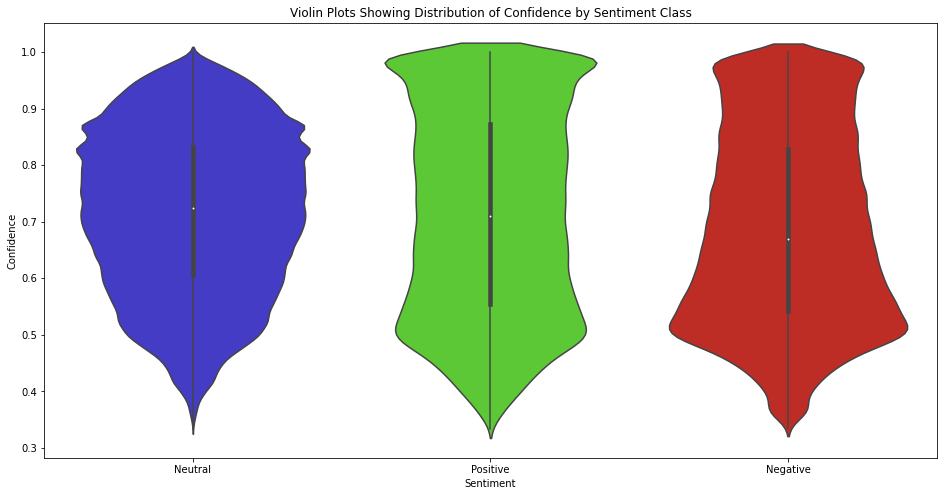

In [ ]:
# Confidence Distribution by Sentiment

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Confidence by Sentiment Class")
g = sns.violinplot(data=master_df, x="Sentiment", y="Confidence", palette=s_pal(1,2,0), cut=1.0)
plt.show()

## Effects of Sentiment Class and Category on Frequency and Likes

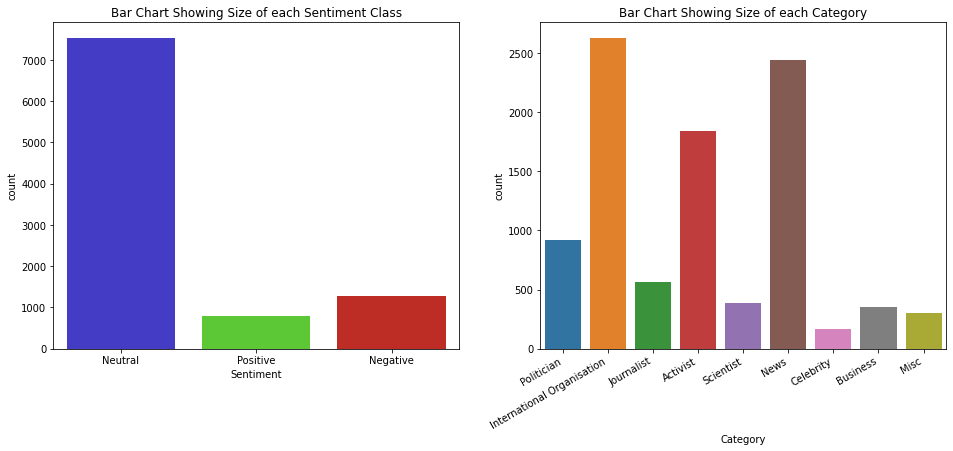

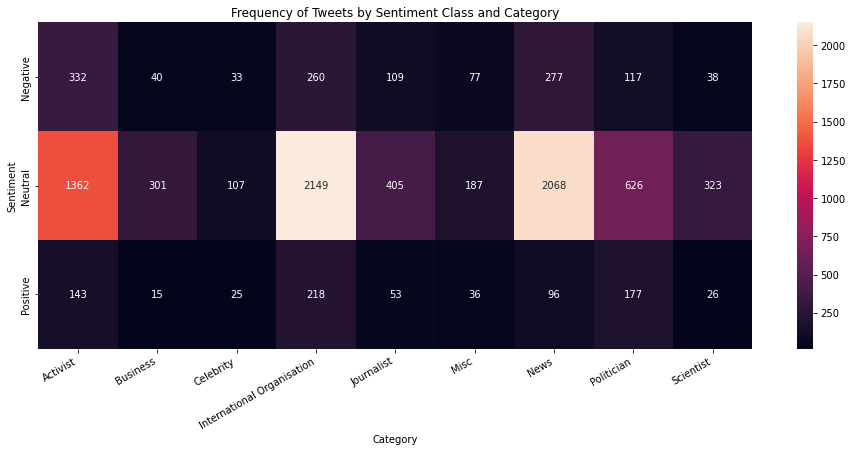

In [ ]:
# Frequency Plots

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Bar Chart Showing Size of each Sentiment Class")
sns.countplot(data=master_cat_df, x="Sentiment", palette=s_pal(1,2,0))

plt.subplot(122)
plt.title("Bar Chart Showing Size of each Category")
g=sns.countplot(data=master_cat_df, x="Category")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

plt.figure(figsize=(16,6))
plt.title("Frequency of Tweets by Sentiment Class and Category")
heat = sns.heatmap(master_cat_df.pivot_table(values="ID",index="Sentiment",columns="Category",aggfunc="count").fillna(0.0), annot=True, fmt="g")
heat.set_xticklabels(heat.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

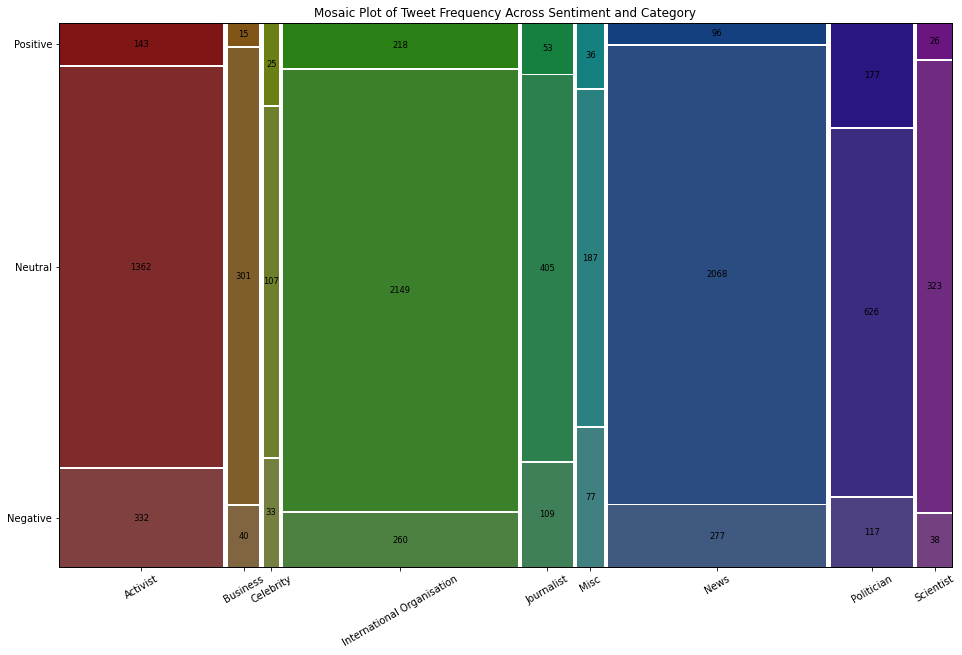

In [ ]:
mosaic_labeller = lambda k: dict(master_cat_df.groupby(["Category", "Sentiment"]).count()["ID"])[k]
with plt.rc_context():
    plt.rc("figure", figsize=(16,10))
    g=mosaic(master_cat_df[["Category", "Sentiment"]].sort_values(["Sentiment","Category"]),
             index=["Category", "Sentiment"], title="Mosaic Plot of Tweet Frequency Across Sentiment and Category",
             labelizer=mosaic_labeller, label_rotation=[30,0])
plt.show()

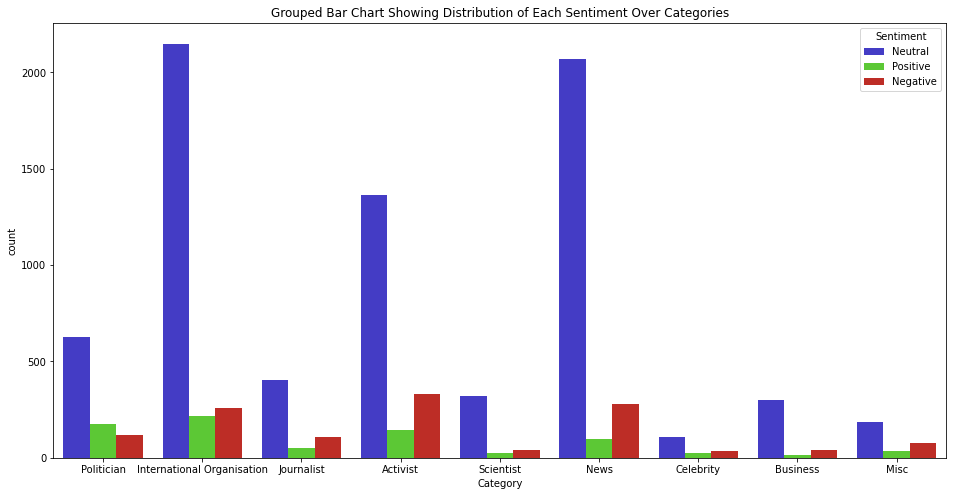

In [ ]:
# Frequency by Category

plt.figure(figsize=(16,8))
plt.title("Grouped Bar Chart Showing Distribution of Each Sentiment Over Categories")
sns.countplot(data=master_cat_df, x="Category", hue="Sentiment", palette=s_pal(1,2,0))
plt.show()

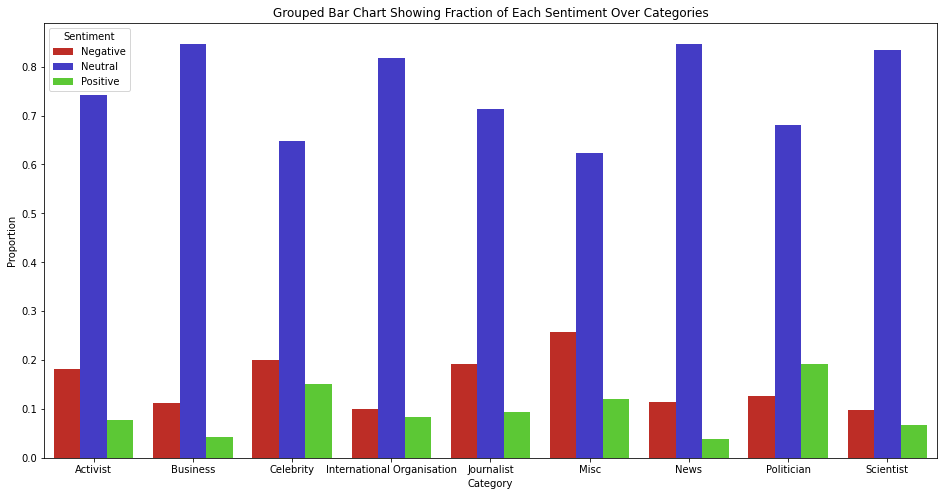

In [ ]:
# Fraction of Sentiments over categories

plt.figure(figsize=(16,8))
plt.title("Grouped Bar Chart Showing Fraction of Each Sentiment Over Categories")

sentiment_cat_df = master_cat_df.groupby(["Category","Sentiment"]).size().unstack(fill_value=0)
sentiment_cat_df = sentiment_cat_df.div(sentiment_cat_df.sum(axis=1), axis=0).reset_index()
sentiment_cat_df = sentiment_cat_df.melt("Category", var_name="Sentiment", value_name="Proportion")

sns.barplot(data=sentiment_cat_df, x="Category", y="Proportion", hue="Sentiment", palette=s_pal(0,1,2))
plt.show()

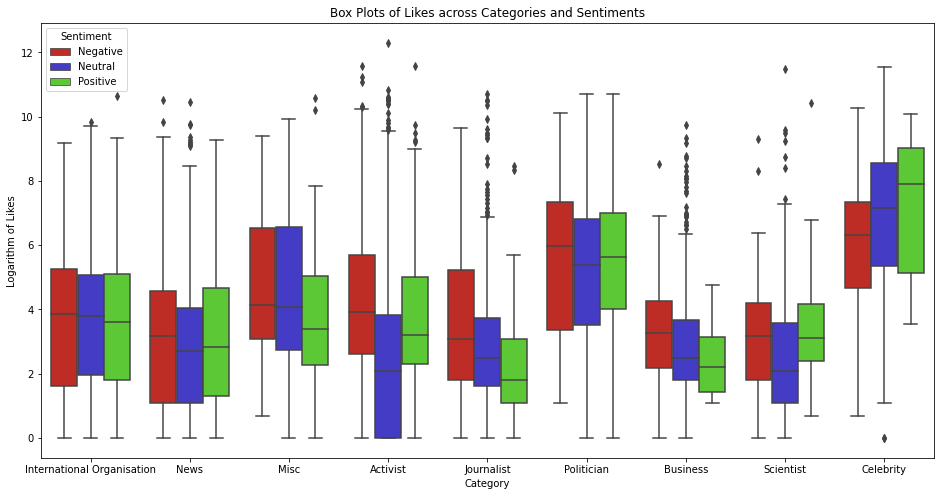

In [ ]:
# Box Plots for Likes by Sentiment and Category

plt.figure(figsize=(16,8))
plt.title("Box Plots of Likes across Categories and Sentiments")
g = sns.boxplot(x=master_cat_df.sort_values("Sentiment")["Category"],
                y=np.log(master_cat_df.sort_values("Sentiment")["Likes"]+1),
                hue=master_cat_df.sort_values("Sentiment")["Sentiment"],
                palette=s_pal(0,1,2))
plt.ylabel("Logarithm of Likes")
plt.show()

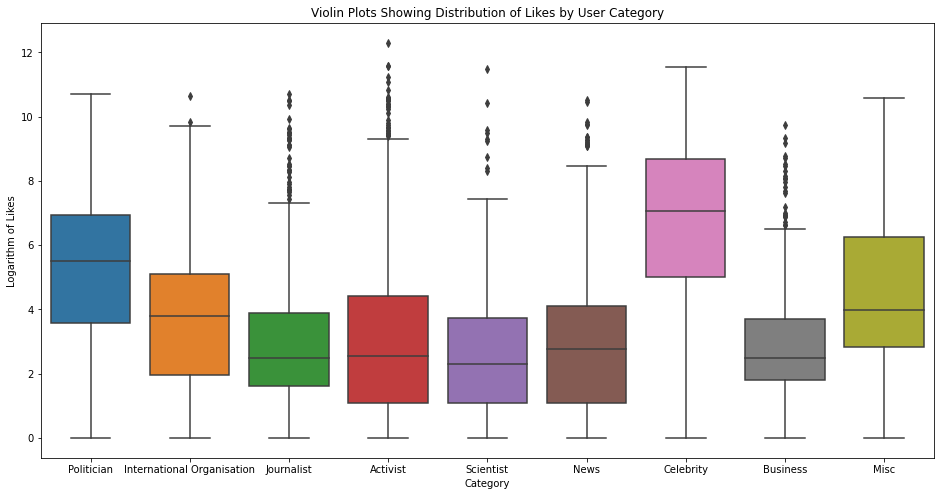

In [ ]:
# Likes Distribution by Category

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Likes by User Category")
g = sns.boxplot(x=master_df["Category"], y=np.log(master_df["Likes"]+1))
plt.ylabel("Logarithm of Likes")
plt.show()

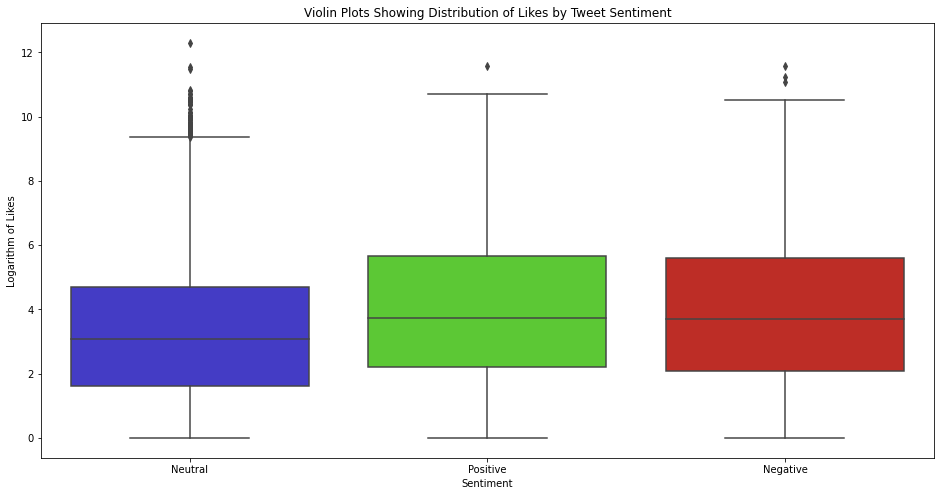

In [ ]:
# Likes Distribution by Sentiment

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Likes by Tweet Sentiment")
g = sns.boxplot(x=master_cat_df["Sentiment"], y=np.log(master_cat_df["Likes"]+1), palette=s_pal(1,2,0))
plt.ylabel("Logarithm of Likes")
plt.show()

## Sampling Tweet Content across Sentiments and Categories

In [ ]:
# display some of the "business" category negatively labelled tweets
pd.set_option('display.max_colwidth', None)
master_cat_df[(master_cat_df['Category']=='Business') & (master_cat_df['Sentiment']=='Negative')][['Content', 'Category', 'Sentiment']].sample(frac=1)

,Content,Category,Sentiment
160538,"“Indigenous blood, not one more drop.”\n\nBrazil’s indigenous people rallied outside #COP25 in Madrid calling for accountability over the killing of 2 Guajajara leaders. The Guajajara are known for its forest guardians who protect land against illegal deforestation https://t.co/6qsjMb3a5d",Business,Negative
143117,"The future is calling: «When the last tree dies, the last man die» Plant more trees and protect our forests for climate and biodiversity. #FridaysForFuture #6dnow #COP25 #SDG13 https://t.co/JMee91pvrC",Business,Negative
138607,"These #EcoSchools kids started out learning abt impact of waste, then made a schoolgarden and planted trees with #compost from #foodwaste-next step was to learn abt the connection to #ClimateChange. On their first #ClimateMarch #Savetheforest is their chosen slogan #COP25 https://t.co/ao3YK35rPy",Business,Negative
51606,"#DidYouKnow TRASH contributes to #ClimateChange? In 2016 alone, 1.6 billion tonnes of carbon was generated from waste, excluding transportation, making up 5% of global emissions. Read #WhatAWaste2 to learn more: https://t.co/i2ffqzFU8A #ClimateAction #COP24 https://t.co/dKt9PFWo3L",Business,Negative
1002869,"Day 9 Cop26 Just one beef farm in Australia sequestered 40,000 tes of carbon, earning $0.5 million from microsoft. Livestock ag practices are changing. Facts force us all to reflect on how meat is moving from part of the problem, to part of the solution. https://t.co/HeFa2v58Yk https://t.co/r9wYYXYcBw",Business,Negative
382005,"And in case you didn't know, lobbyists heading to COP26 to get meat taxed were implicated in trying to stop the publication of science that shows that meat isn't linked to cancer. Apparently they only like science to progress when it agrees with what they want to believe. https://t.co/3qI8NYMcCt",Business,Negative
136668,Committed to fight #ClimateChange with ACTIONS 👉 More clean energy ♻️ and stop fossil fuels ⛔️ for a more habitable planet 🌍💚 #TimeToAct #COP25\nhttps://t.co/9clsG8F60v https://t.co/bIsL28rMDq,Business,Negative
39048,A reminder: \nPast CO2 emissions created the climate problem.\nCurrent CO2 emissions make it worse.\nRising CO2 emissions make it worse faster. And that's what's happening now. \n#COP24 https://t.co/qZtfq1OH5D,Business,Negative
27345,".@WBG_Transport Dominic Patella: ""Like any disruptive technology, #eMobility provides parallel opportunities and captures other development gains like gender equality"" #MDBTalks #COP24 https://t.co/HRkE1aLG4w",Business,Negative
128242,Our international mother organization @FEEInt working to get Education for Sustainable Development mandatory! #COP25 https://t.co/0LYHni22cU,Business,Negative


In [ ]:
# display some of the "politician" category positively labelled tweets
pd.set_option('display.max_colwidth', None)
master_cat_df[(master_cat_df['Category']=='Politician') & (master_cat_df['Sentiment']=='Positive')][['Content', 'Category', 'Sentiment']].sample(frac=1)

,Content,Category,Sentiment
1102495,"It's clear that the aim of COP26 to keep 1.5 alive is in mortal peril. \n\nThere's been some progress on the pathway out of Glasgow but still too much ambiguity. It is vital there is no backsliding, no fudges, and no bending over backwards for the big emitters.\n\n#COP26 @BBCr4Today https://t.co/M9jzn9ABn5",Politician,Positive
514437,"It will be a lively show on @JeremyVineOn5 tomorrow\n\nTAX RED MEAT TO SAVE PLANET? ❌\n\nIS BRITAIN BEING PUNISHED FOR BREXIT? ✅ \n\nNATIONAL TRUST RIGHT TO BAN TRAIL HUNTING? ❌\n\nPLUS #COP26 #ClimateHypocrisy \n\nI’m expecting to be sole voice of common sense, as usual, so tune in!",Politician,Positive
1158005,"We must end fossil fuel subsidies.\nPhase out coal.\nPut a price on carbon.\nProtect vulnerable communities.\nAnd make good on the $100 billion climate finance commitment to support developing countries. \n\nWe didn't achieve that at #COP26, but we have building blocks for progress.",Politician,Positive
356791,"Soon, the eyes of the world will be on @COP26.\n\nWe have to act. Our climate can’t wait. \n\nWe now need to hear concrete plans to keep within reach the limiting of global warming to 1.5 degrees. \n\nAnd we need to support the most vulnerable countries.",Politician,Positive
11707,Thank you to the #G20 for your strong statement of support for a successful outcome of the @UN #ClimateChange Conference #COP24 https://t.co/fmUWylkdx2 #ParisAgreement #Talanoa4Ambition #G20Argentina https://t.co/6NXYJayDIe,Politician,Positive
...,...,...,...
554337,I’ll be attending #COP26 later this week. Here are some of the events I’ll be participating in and crucially my keys asks for Wales and the world ⁦@WelshGovernment⁩ https://t.co/xzuYF3fD3I,Politician,Positive
846302,So proud of this legend @EmilyRoseJ12 from our @futuregencymru Future Leaders Academy representing Wales and @NatResWales in #COP26 https://t.co/d6Op5PWXRn,Politician,Positive
66684,"Fantastic seeing Canadian universities represented at #COP24! Thank you for being here and for all the good work you’re doing, @AcadiaUPres. (cc: @ScottBrison) https://t.co/by5D6WhL7p",Politician,Positive
175623,Young people are a big inspiration for the #EUGreenDeal\n\nI’m really looking forward to talking and listening to a group of +250 young people about it now at #COP25 \n\nYou can follow the discussion here 11-12h:\nhttps://t.co/gsQ0ITmwgp\n\n#FridaysForFuture https://t.co/wnBUXe1BC2,Politician,Positive


## Pareto Modelling and ANOVA

In [ ]:
# Model the number of likes as a Pareto RV and find the parameters

b, loc, scale = scipy.stats.pareto.fit(master_cat_df["Likes"])
b, loc, scale

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(0.37139008207704527, -2.5393768881676273, 2.5393768648064716)

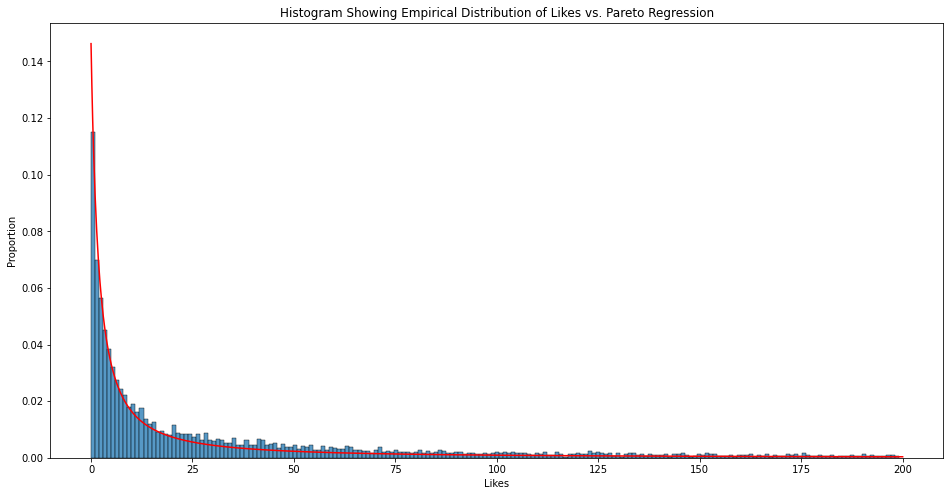

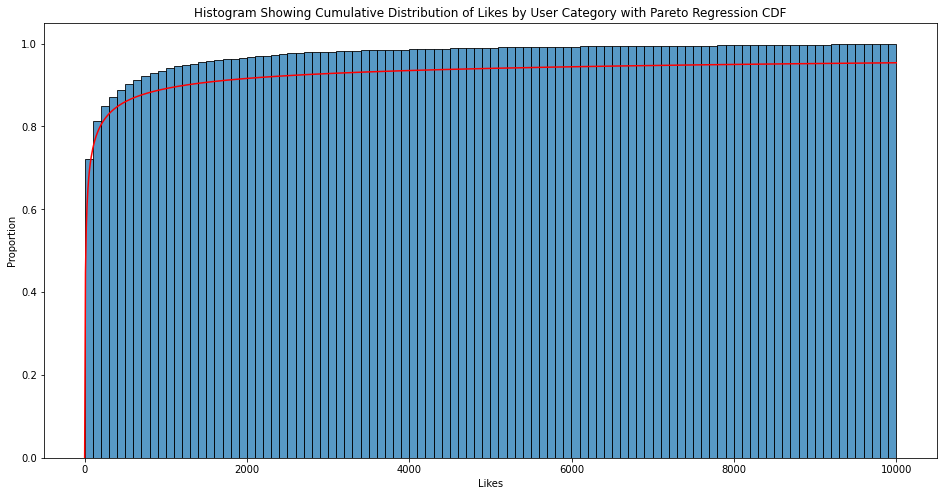

In [ ]:
# PDF Plot
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Empirical Distribution of Likes vs. Pareto Regression")
g = sns.histplot(x=(master_cat_df[master_cat_df["Likes"]<200]["Likes"]), bins=200, stat="proportion")
X = np.linspace(0,200,1001)
plt.plot(X, scipy.stats.pareto.pdf(X, b, loc, scale), c="red")
plt.xlabel("Likes")
plt.show()

# CDF Plot
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Cumulative Distribution of Likes by User Category with Pareto Regression CDF")
g = sns.histplot(x=(master_cat_df[master_cat_df["Likes"]<10000]["Likes"]), bins=100, stat="proportion", cumulative=True)
X = np.linspace(0,10000,1001)
plt.plot(X, scipy.stats.pareto.cdf(X, b, loc, scale), c="red")
plt.xlabel("Likes")
plt.show()

In [ ]:
# Box-Cox Transform on Likes
likes_transformed_df = master_cat_df[master_cat_df["Likes"]>0].reset_index()
likes_boxcox, lmbda = scipy.stats.boxcox(likes_transformed_df["Likes"], lmbda=None, alpha=None, optimizer=None)
likes_transformed_df = pd.concat([likes_transformed_df, pd.DataFrame(likes_boxcox, columns=["Likes_TF"])], axis=1)
lmbda

-0.08542139004524057

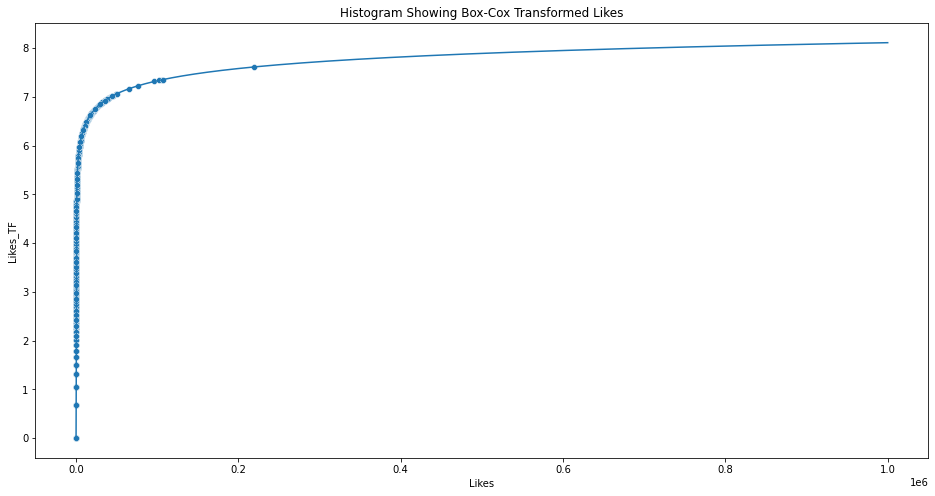

In [ ]:
# Transformation Plot
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Box-Cox Transformed Likes")
X = np.linspace(0,1e6,1001)
sns.lineplot(x=X, y=(((X+1)**lmbda)-1)/lmbda)
sns.scatterplot(data=likes_transformed_df, x="Likes", y="Likes_TF")
plt.xlabel("Likes")
plt.show()

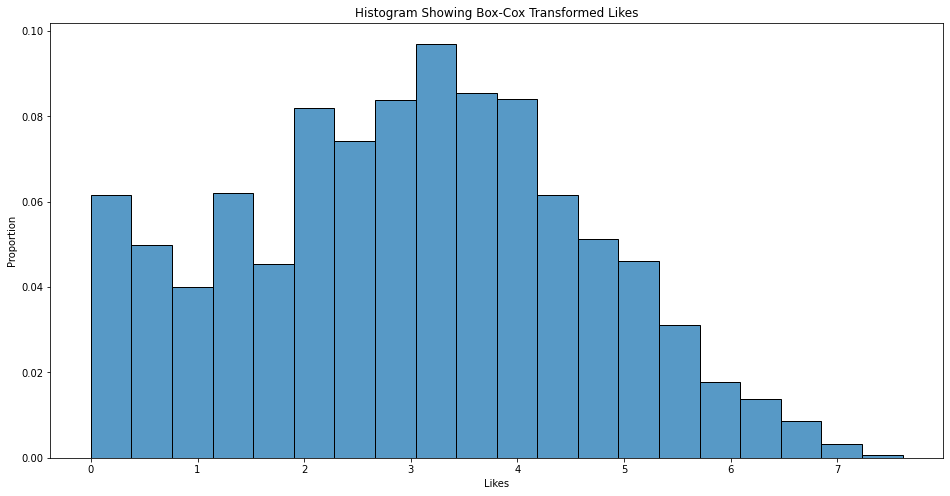

In [ ]:
# PDF Plot of Transformed data
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Box-Cox Transformed Likes")
g = sns.histplot(data=likes_transformed_df, x="Likes_TF", bins=20, stat="proportion")
plt.xlabel("Likes")
plt.show()

In [ ]:
likes_transformed_df = pd.concat([likes_transformed_df,
                                  pd.DataFrame([list(sentiment_lookup.values()).index(x) - 1 for x in likes_transformed_df["Sentiment"]], columns=["Sent_Int"])], axis=1)
likes_transformed_df

,index,level_0,ID,Date,Time,Likes,Replies,Retweets,User ID,Username,...,Content,Category,Negative Probability,Neutral Probability,Positive Probability,Sentiment,Confidence,Conference,Likes_TF,Sent_Int
0,151,151,1063077542490505216,2018-11-15,14:33:31,42.0,3.0,32.0,2.148424e+08,PEspinosaC,...,Met with Costa Rican Environment Minister Carlos Manuel Rodríguez on the margins of #UNBiodiversityConference #COP14. Discussed importance of finalizing #ParisAgreement implementation guidelines at @UNFCCC #COP24 praised Costa Rica for its ambtious #CarbonNeutrality plans https://t.co/MlNia1Onr0,Politician,0.301459,0.499533,0.199008,Neutral,0.499533,24,3.199734,0
1,172,172,1063102498725072896,2018-11-15,16:12:41,56.0,6.0,36.0,1.746392e+07,UNFCCC,...,"The challenges of #climatechange, #desertification &amp; #biodiversity are interlinked https://t.co/Krnb01qrUi Three #RioConventions promote synergies in these fields are at CBD #COP14 in Egypt with a @RioPavilion &amp; will also be present at #COP24 in Poland https://t.co/oONNWAFUcy",International Organisation,0.064514,0.695169,0.240317,Neutral,0.695169,24,3.406237,0
2,396,396,1063523438529314816,2018-11-16,20:05:21,11.0,0.0,12.0,2.023133e+08,WRIClimate,...,"BLOG: The upcoming climate change conference in Katowice, Poland in December (#COP24) is the single-biggest immediate opportunity for countries to show they’re taking the 1.5°C report seriously. Read on: https://t.co/zS9n9n0XFd #SR15 #ClimateChange https://t.co/CtEP3AVuLl",International Organisation,0.036618,0.946422,0.016961,Neutral,0.946422,24,2.168256,0
3,440,440,1063718384670568448,2018-11-17,09:00:00,968.0,24.0,641.0,1.746392e+07,UNFCCC,...,"Only 15 days until the @UN’s #ClimateChange conference #COP24! https://t.co/8FVxgt5qjz Two years ago, the #ParisAgreement entered into force with record speed. Now governments are set to finalize its implementation guidelines. https://t.co/JO43VWlCtX",International Organisation,0.007941,0.640463,0.351595,Neutral,0.640463,24,5.199746,0
4,519,519,1063897312856920065,2018-11-17,20:51:00,1182.0,54.0,600.0,8.112297e+17,antonioguterres,...,"There is no alternative to the #ParisAgreement. To realistically address climate change, next month’s #COP24 must be a success. https://t.co/pFi2ZcbMKS #ClimateAction https://t.co/bmteNphDBw",Politician,0.130569,0.790467,0.078964,Neutral,0.790467,24,5.309821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8711,1240581,979514,1464267108863426561,2021-11-26,16:17:38,374.0,30.0,189.0,1.195026e+18,COP26,...,"🗣️ ""What was achieved at COP26?""\n\nThe #COP26 Glasgow Climate Pact sets out the historic agreements made at the summit 👇\n\n#ClimateAction | #TogetherForOurPlanet",International Organisation,0.141763,0.520430,0.337807,Neutral,0.520430,26,4.649101,0
8712,1241190,980123,1464338964760825860,2021-11-26,21:03:09,76.0,5.0,20.0,3.299212e+09,EmpireFiles,...,"🔒NEW PODCAST // Inside #COP26 w/ @AbbyMartin :: Hear about the trade-show atmosphere, undercover oil lobbyists, confronting Pelosi, and all our unreleased footage for #EarthsGreatestEnemy only on Patron https://t.co/NXmFIbl9yJ",Misc,0.099189,0.874859,0.025952,Neutral,0.874859,26,3.619964,0
8713,1241265,980198,1464353276053307399,2021-11-26,22:00:02,8.0,0.0,2.0,1.021876e+18,DohaDebates,...,"""I want to hear firsthand how these world leaders are betraying us.""\n\nBeing a climate activist isn't easy — @mitzijonelle would know. They sat down with @nelufar to talk about being in the negotiating room at #COP26, the expectations of being a climate activist and so much more. https://t.co/MRamft9BWZ",Misc,0.662079,0.265189,0.072732,Negative,0.662079,26,1.905223,-1
8714,1241951,980884,1464549561821806595,2021-11-27,11:00:00,157.0,12.0,68.0,1.195026e+18,COP26,...,"""Rather than art as decoration, I think art is almost the why and the science and the politics are the how.""\n\nSee how #ClimateAction has been a source of inspiration for the creative industries 👇\n\n#COP26 | #TogetherForO

In [ ]:
# Two-way ANOVA
model = ols('Likes_TF ~ C(Category) + C(Sentiment) + C(Category):C(Sentiment)', data=likes_transformed_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Category),2869.032289,8.0,162.018925,1.368270e-255
C(Sentiment),131.757199,2.0,29.762174,1.313785e-13
C(Category):C(Sentiment),149.281009,16.0,4.215071,3.027891e-08
Residual,19233.109354,8689.0,NaN,NaN


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Likes_TF   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     57.15
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          1.34e-273
Time:                        14:22:49   Log-Likelihood:                -15817.
No. Observations:                8716   AIC:                         3.169e+04
Df Residuals:                    8689   BIC:                         3.188e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              3.4639      0.083     41.714      0.000       3.301       3.627
C(Category)[T.Business]                                               -0.7604      0.252     -3.014      0.003      -1.255      -0.266
C(Category)[T.Celebrity]                                               1.0729      0.272      3.945      0.000       0.540       1.606
C(Category)[T.International Organisation]                             -0.3662      0.127     -2.881      0.004      -0.615      -0.117
C(Category)[T.Journalist]                                             -0.3345      0.170     -1.970      0.049      -0.667      -0.002
C(Category)[T.Misc]                                                    0.2784      0.189      1.474      0.140      -0.092       0.648
C(Category)[T.News]                                                   -0.6368      0.127     -5.028      0.000      -0.885      -0.389
C(Category)[T.Politician]                                              0.8022      0.161      4.993      0.000       0.487       1.117
C(Category)[T.Scientist]                                              -0.6765      0.258     -2.619      0.009      -1.183      -0.170
C(Sentiment)[T.Neutral]                                               -0.7739      0.095     -8.123      0.000      -0.961      -0.587
C(Sentiment)[T.Positive]                                              -0.4034      0.150     -2.684      0.007      -0.698      -0.109
C(Category)[T.Business]:C(Sentiment)[T.Neutral]                        0.5531      0.271      2.041      0.041       0.022       1.084
C(Category)[T.Celebrity]:C(Sentiment)[T.Neutral]                       1.3031      0.312      4.179      0.000       0.692       1.914
C(Category)[T.International Organisation]:C(Sentiment)[T.Neutral]      0.7685      0.139      5.512      0.000       0.495       1.042
C(Category)[T.Journalist]:C(Sentiment)[T.Neutral]                      0.1277      0.192      0.665      0.506      -0.248       0.504
C(Category)[T.Misc]:C(Sentiment)[T.Neutral]                            0.6832      0.223      3.062      0.002       0.246       1.121
C(Category)[T.News]:C(Sentiment)[T.Neutral]                            0.4045      0.139      2.903      0.004       0.131       0.678
C(Category)[T.Politician]:C(Sentiment)[T.Neutral]                      0.6289      0.178      3.540      0.000       0.281       0.977
C(Category)[T.Scientist]:C(Sentiment)[T.Neutral]                       0.0752      0.276      0.272      0.785      -0.466       0.617
C(Category)[T.Business]:C(Sentiment)[T.Positive]                      -0.3237      0.476     -0.680      0.497   

In [ ]:
# Normality Test
_, pval = scipy.stats.normaltest(likes_transformed_df["Likes_TF"])
pval

1.7600531194854564e-59

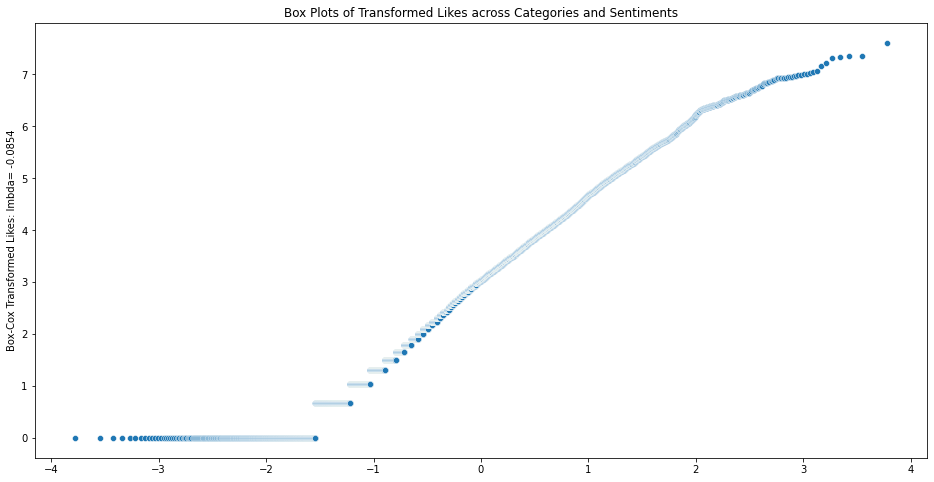

In [ ]:
qqplot, _ = scipy.stats.probplot(likes_transformed_df["Likes_TF"], dist="norm")
plt.figure(figsize=(16,8))
plt.title("Box Plots of Transformed Likes across Categories and Sentiments")
g = sns.scatterplot(x=qqplot[0], y=qqplot[1])
plt.ylabel("Box-Cox Transformed Likes: lmbda= "+str(lmbda)[:7])
plt.show()

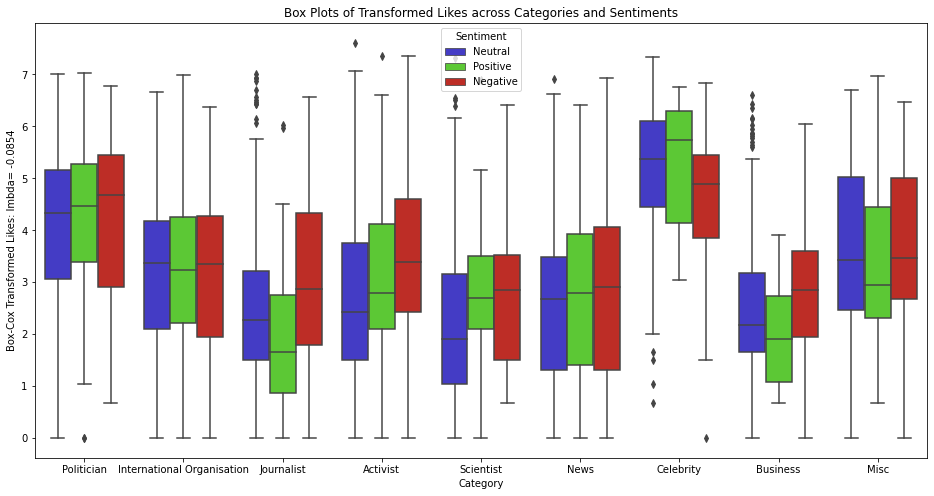

In [ ]:
# Transformed Likes Plots

plt.figure(figsize=(16,8))
plt.title("Box Plots of Transformed Likes across Categories and Sentiments")
g = sns.boxplot(data=likes_transformed_df, x="Category", y="Likes_TF", hue="Sentiment", palette=s_pal(1,2,0))
plt.ylabel("Box-Cox Transformed Likes: lmbda= "+str(lmbda)[:7])
plt.show()

### Pareto Model Fit by Category

In [ ]:
# Model the number of likes across categories as separate Pareto RVs and find parameters

likes_law_category_df = pd.DataFrame(master_cat_df["Category"].unique(), columns = ["Category"])
likes_law_category_data = np.zeros((9,3))
for i in range(len(likes_law_category_df)):
    b, loc, scale = scipy.stats.pareto.fit(master_cat_df[master_cat_df["Category"] == likes_law_category_df.iloc[i,0]]["Likes"])
    likes_law_category_data[i] = np.array([b, loc, scale])
likes_law_category_df = pd.concat([likes_law_category_df, pd.DataFrame(likes_law_category_data, columns = ["b","loc","scale"])], axis=1)
likes_law_category_df.set_index("Category", inplace=True)
likes_law_category_df

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,b,loc,scale
Category,,,
Politician,0.257249,-4.426927,4.426927
International Organisation,0.358608,-3.080827,3.080827
Journalist,0.422977,-2.352384,2.352384
Activist,0.436558,-2.520128,2.520128
Scientist,0.120679,-1.793911,1.793911
News,0.362702,-1.313493,1.313493
Celebrity,0.175911,-2.592502,2.592499
Business,0.369404,-1.655625,1.655625
Misc,0.266434,-2.499570,2.499570


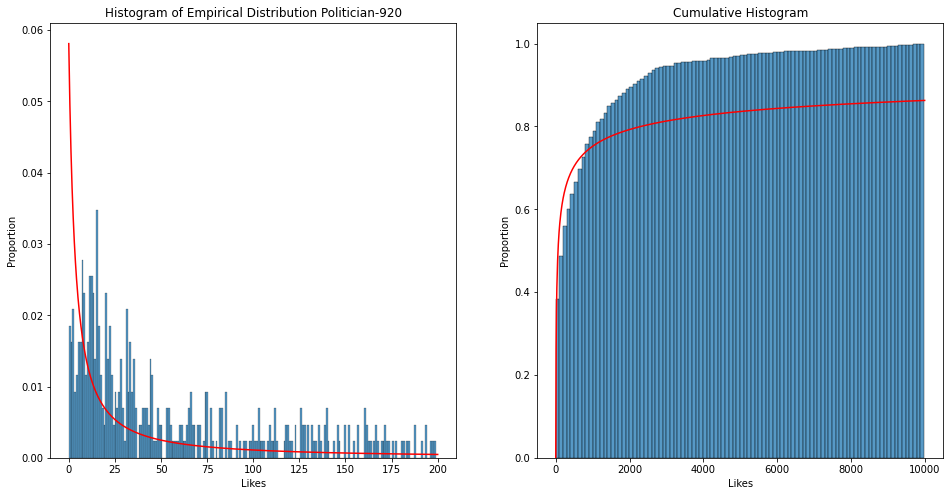

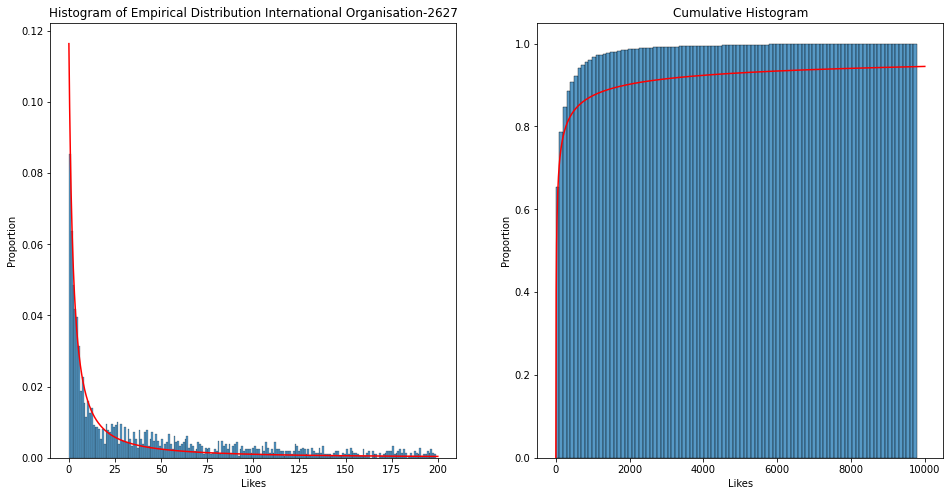

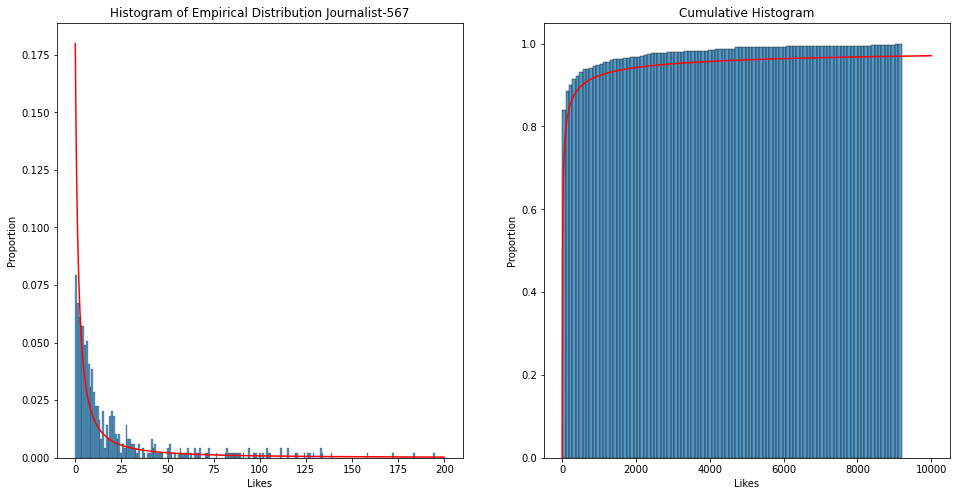

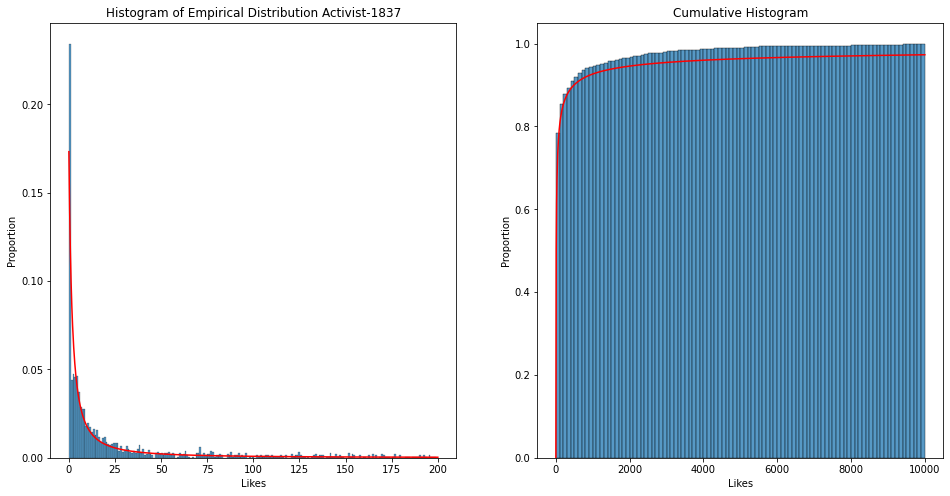

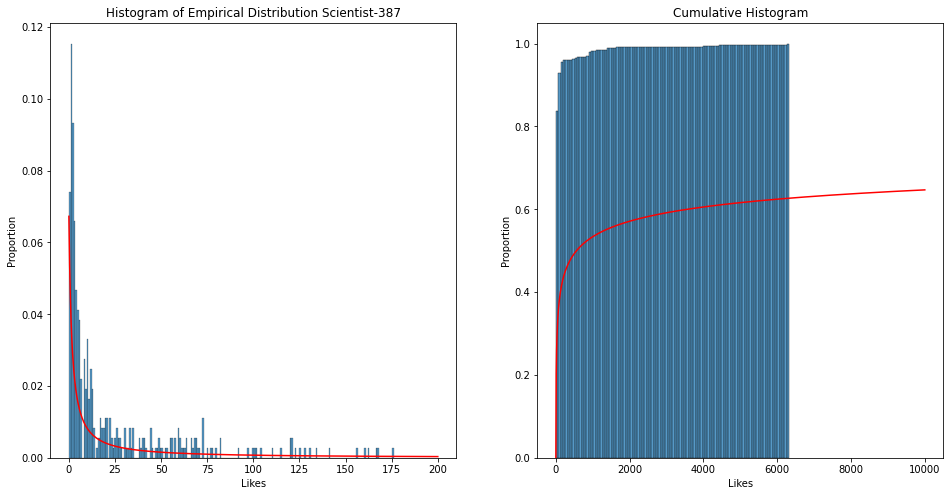

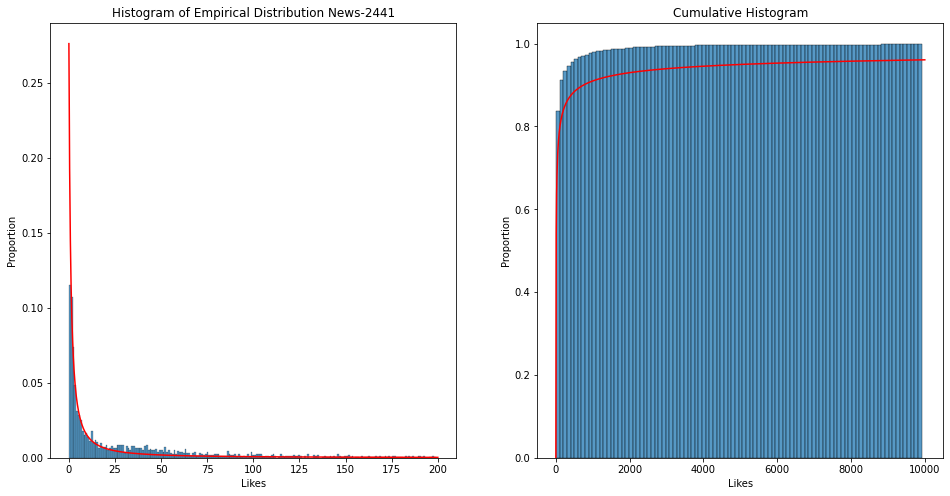

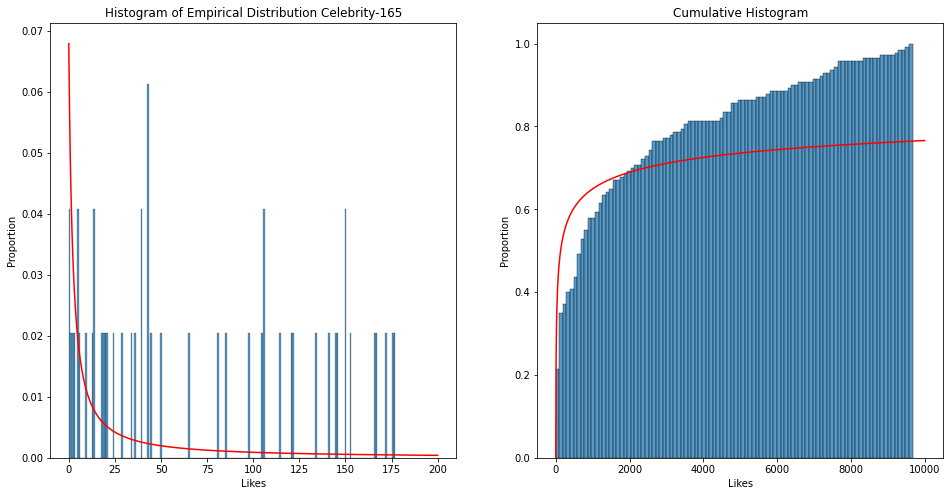

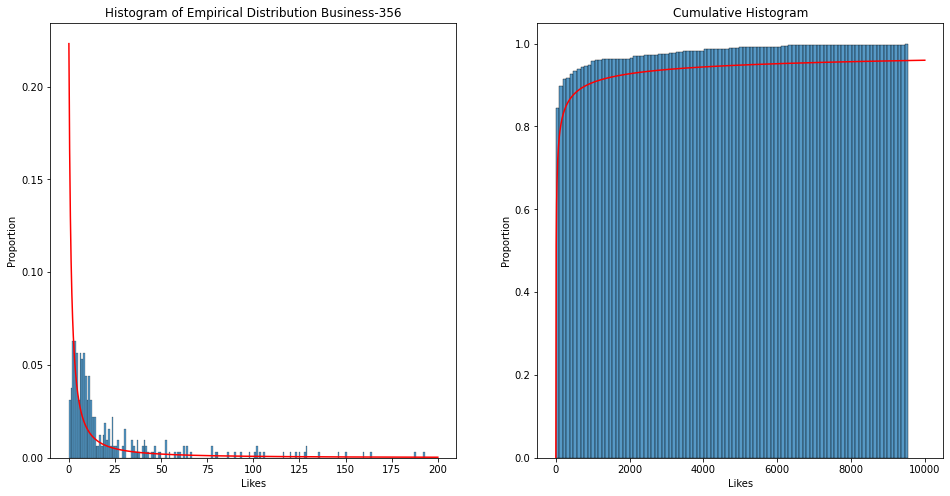

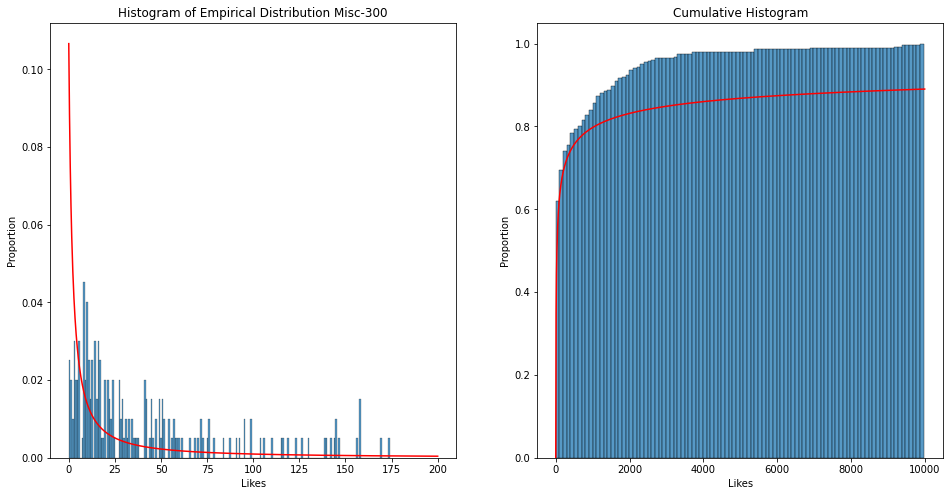

In [ ]:
# Plot PDFs and CDFs

for cat in likes_law_category_df.index:
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title("Histogram of Empirical Distribution "+cat+"-"+str(sum(master_cat_df["Category"]==cat)))
    g = sns.histplot(x=(master_cat_df[(master_cat_df["Likes"]<200) & (master_cat_df["Category"]==cat)]["Likes"]), bins=200, stat="proportion")
    X = np.linspace(0,200,1001)
    plt.plot(X, scipy.stats.pareto.pdf(X, *tuple(likes_law_category_df.loc[cat])), c="red")
    plt.xlabel("Likes")

    plt.subplot(122)
    plt.title("Cumulative Histogram")
    g = sns.histplot(x=(master_cat_df[(master_cat_df["Likes"]<10000) & (master_cat_df["Category"]==cat)]["Likes"]), bins=100, stat="proportion", cumulative=True)
    X = np.linspace(0,10000,1001)
    plt.plot(X, scipy.stats.pareto.cdf(X, *tuple(likes_law_category_df.loc[cat])), c="red")
    plt.xlabel("Likes")
    plt.show()

### Pareto Model Fit by Sentiment

In [ ]:
# Model the number of likes across sentiment classes as separate Pareto RVs and find parameters

likes_law_sentiment_df = pd.DataFrame(master_cat_df["Sentiment"].unique(), columns = ["Sentiment"])
likes_law_sentiment_data = np.zeros((3,3))
for i in range(len(likes_law_sentiment_df)):
    b, loc, scale = scipy.stats.pareto.fit(master_cat_df[master_cat_df["Sentiment"] == likes_law_sentiment_df.iloc[i,0]]["Likes"])
    likes_law_sentiment_data[i] = np.array([b, loc, scale])
likes_law_sentiment_df = pd.concat([likes_law_sentiment_df, pd.DataFrame(likes_law_sentiment_data, columns = ["b","loc","scale"])], axis=1)
likes_law_sentiment_df.set_index("Sentiment", inplace=True)
likes_law_sentiment_df

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,b,loc,scale
Sentiment,,,
Neutral,0.391651,-2.533375,2.533375
Positive,0.284970,-1.659614,1.659614
Negative,0.288685,-1.664593,1.664593


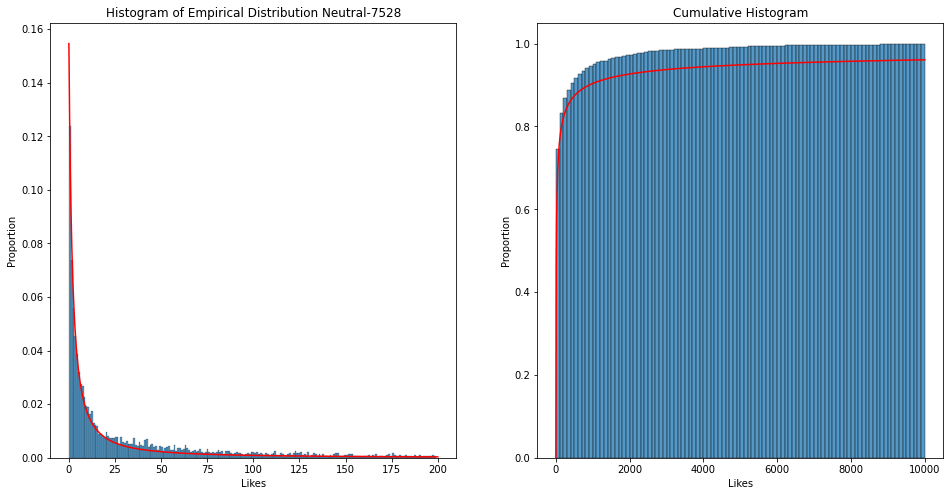

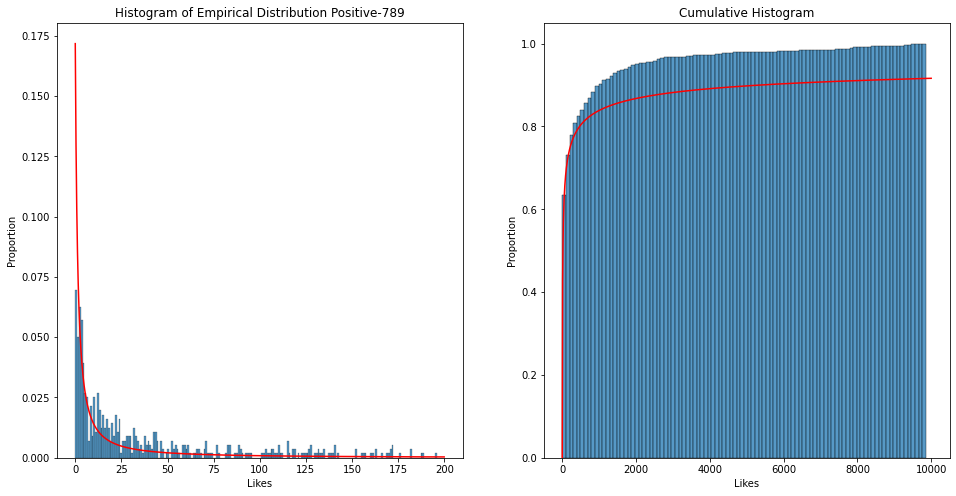

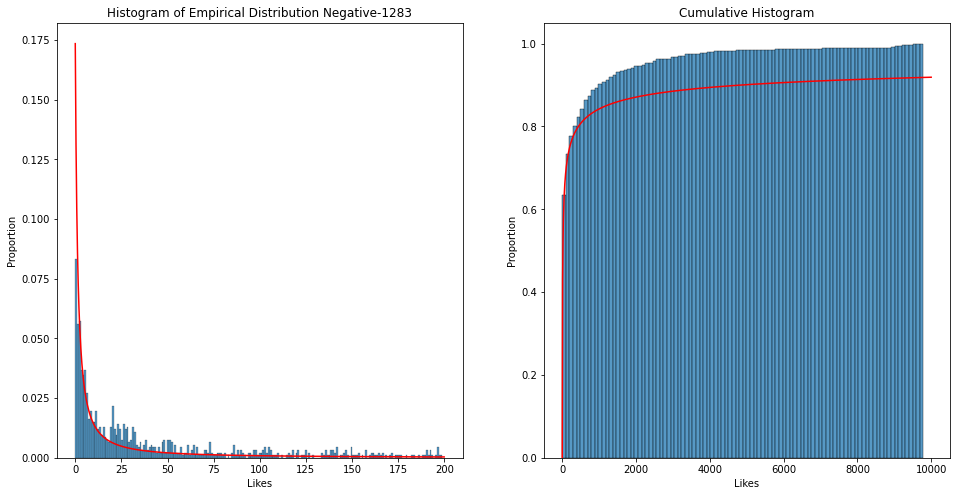

In [ ]:
# Plot PDFs and CDFs

for sent in likes_law_sentiment_df.index:
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title("Histogram of Empirical Distribution "+sent+"-"+str(sum(master_cat_df["Sentiment"]==sent)))
    g = sns.histplot(x=(master_cat_df[(master_cat_df["Likes"]<200) & (master_cat_df["Sentiment"]==sent)]["Likes"]), bins=200, stat="proportion")
    X = np.linspace(0,200,1001)
    plt.plot(X, scipy.stats.pareto.pdf(X, *tuple(likes_law_sentiment_df.loc[sent])), c="red")
    plt.xlabel("Likes")

    plt.subplot(122)
    plt.title("Cumulative Histogram")
    g = sns.histplot(x=(master_cat_df[(master_cat_df["Likes"]<10000) & (master_cat_df["Sentiment"]==sent)]["Likes"]), bins=100, stat="proportion", cumulative=True)
    X = np.linspace(0,10000,1001)
    plt.plot(X, scipy.stats.pareto.cdf(X, *tuple(likes_law_sentiment_df.loc[sent])), c="red")
    plt.xlabel("Likes")
    plt.show()

## Time Series Analysis

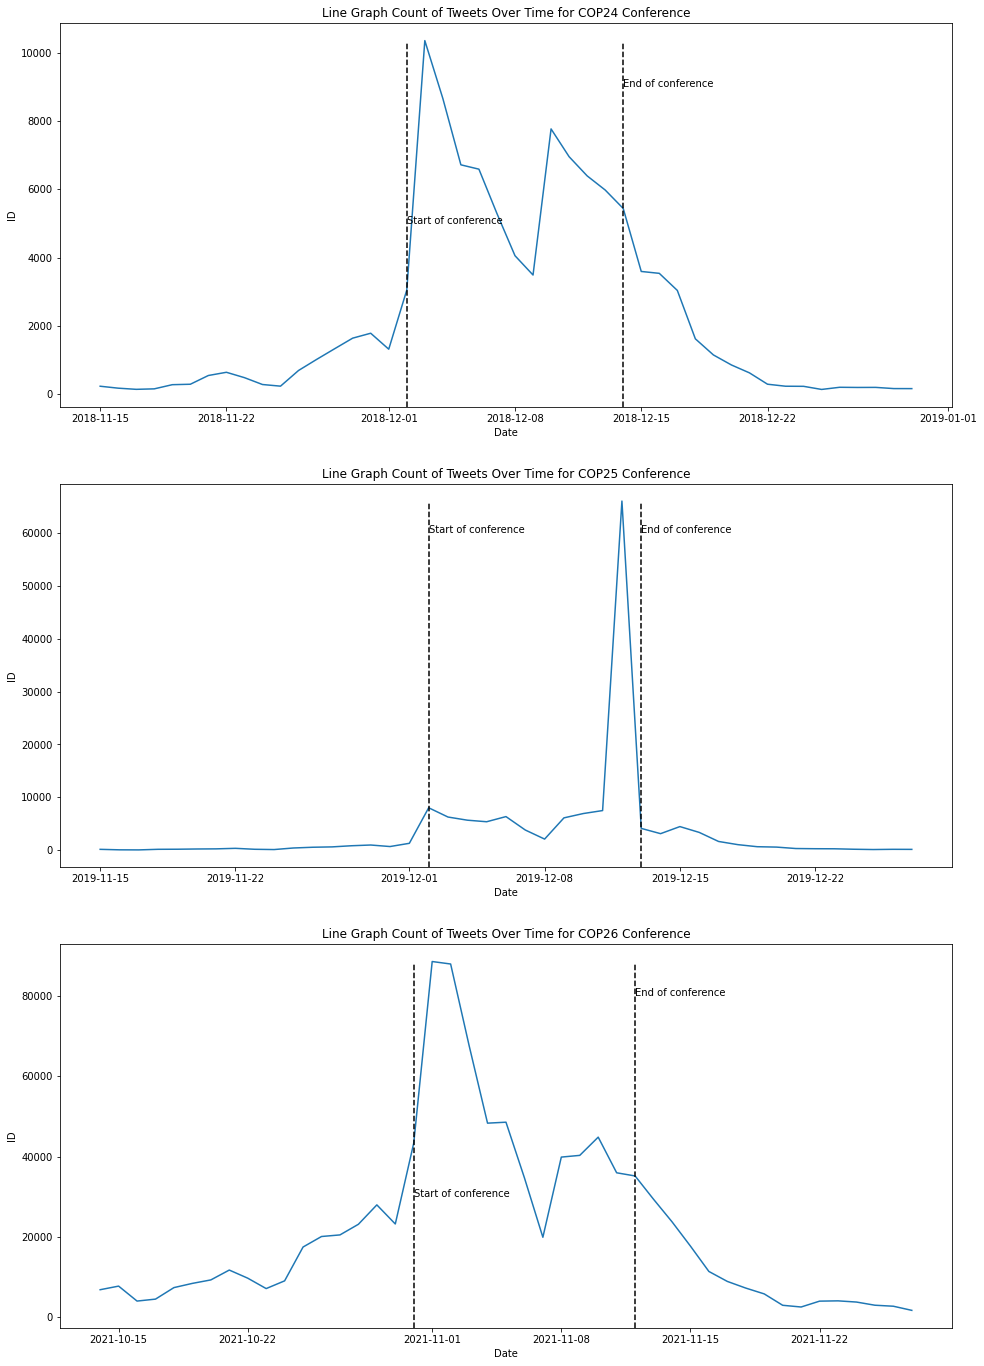

In [ ]:
# Count of tweets over time
plt.figure(figsize=(16,24))

plt.subplot(311)
plt.title("Line Graph Count of Tweets Over Time for COP24 Conference")
g = sns.lineplot(data=cop24_df.groupby("Date").count().reset_index(), x="Date", y="ID")
# Start and end annotations
plt.axvline(start_end_dates[0], 0, 0.95 , color="black", linestyle="--")
plt.axvline(start_end_dates[1], 0, 0.95 , color="black", linestyle="--")
plt.text(start_end_dates[0], 5000, "Start of conference")
plt.text(start_end_dates[1], 9000, "End of conference")

plt.subplot(312)
plt.title("Line Graph Count of Tweets Over Time for COP25 Conference")
g = sns.lineplot(data=cop25_df.groupby("Date").count().reset_index(), x="Date", y="ID")
# Start and end annotations
plt.axvline(start_end_dates[2], 0, 0.95 , color="black", linestyle="--")
plt.axvline(start_end_dates[3], 0, 0.95 , color="black", linestyle="--")
plt.text(start_end_dates[2], 60000, "Start of conference")
plt.text(start_end_dates[3], 60000, "End of conference")

plt.subplot(313)
plt.title("Line Graph Count of Tweets Over Time for COP26 Conference")
g = sns.lineplot(data=cop26_df.groupby("Date").count().reset_index(), x="Date", y="ID")
# Start and end annotations
plt.axvline(start_end_dates[4], 0, 0.95 , color="black", linestyle="--")
plt.axvline(start_end_dates[5], 0, 0.95 , color="black", linestyle="--")
plt.text(start_end_dates[4], 30000, "Start of conference")
plt.text(start_end_dates[5], 80000, "End of conference")

plt.show()

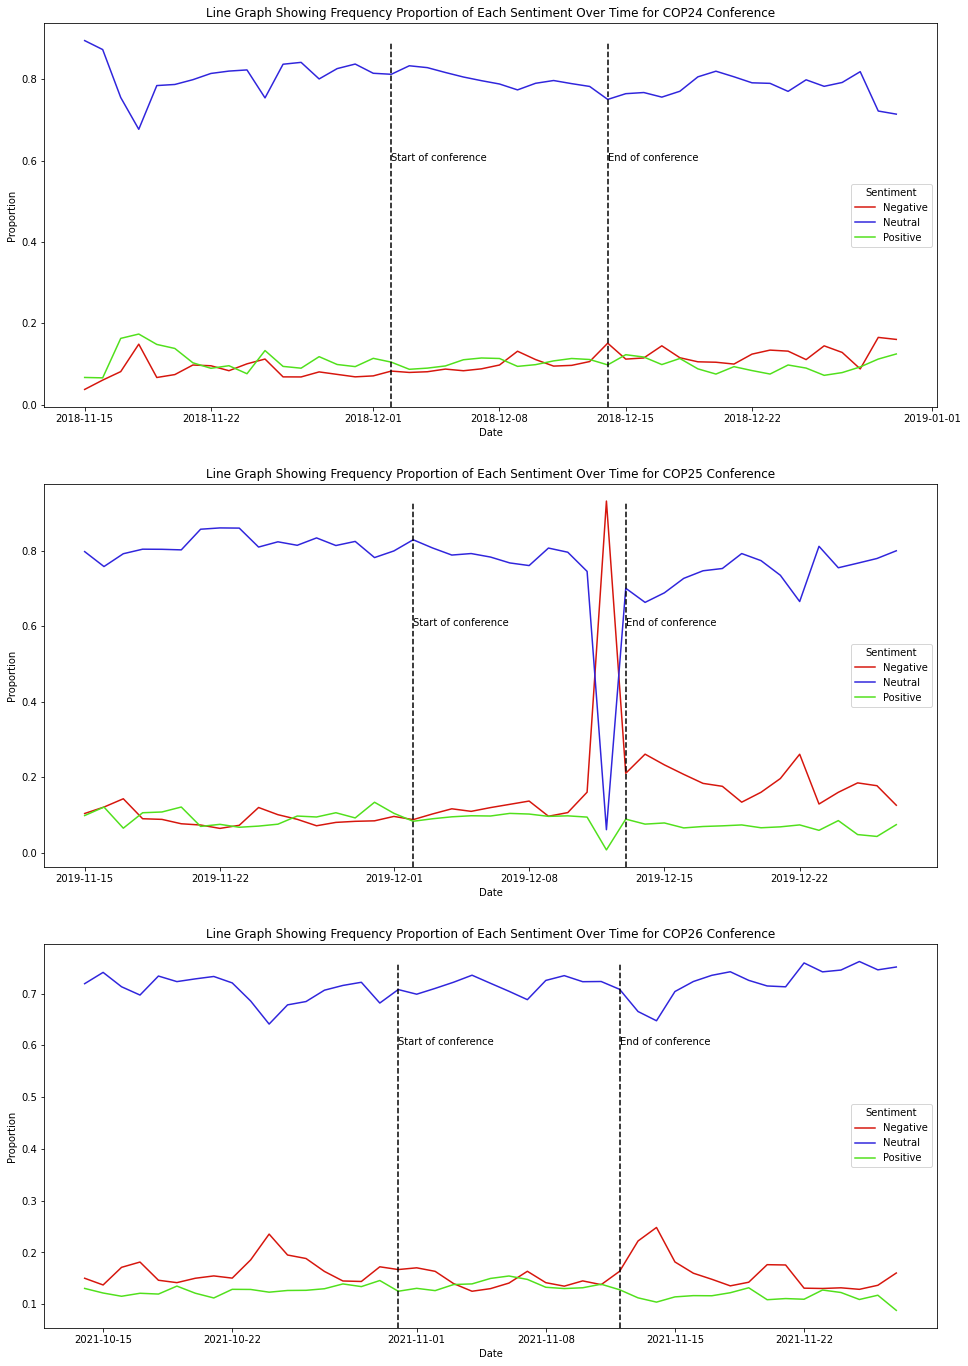

In [ ]:
# Sentiment Frequency over time

plt.figure(figsize=(16,24))

for i, df in enumerate([cop24_df, cop25_df, cop26_df]):
    plt.subplot(311+i)
    plt.title("Line Graph Showing Frequency Proportion of Each Sentiment Over Time for COP"+str(24+i)+" Conference")
    sentiment_date_df = df.groupby(["Date","Sentiment"]).size().unstack(fill_value=0)
    sentiment_date_df = sentiment_date_df.div(sentiment_date_df.sum(axis=1), axis=0).reset_index()
    sentiment_date_df = sentiment_date_df.melt("Date", var_name="Sentiment", value_name="Proportion")
    g = sns.lineplot(data=sentiment_date_df, x="Date", y="Proportion", hue="Sentiment", palette=s_pal(0,1,2))
    # Start and end annotations
    plt.axvline(start_end_dates[2*i], 0, 0.95 , color="black", linestyle="--")
    plt.axvline(start_end_dates[2*i+1], 0, 0.95 , color="black", linestyle="--")
    plt.text(start_end_dates[2*i], 0.6, "Start of conference")
    plt.text(start_end_dates[2*i+1], 0.6, "End of conference")
plt.show()

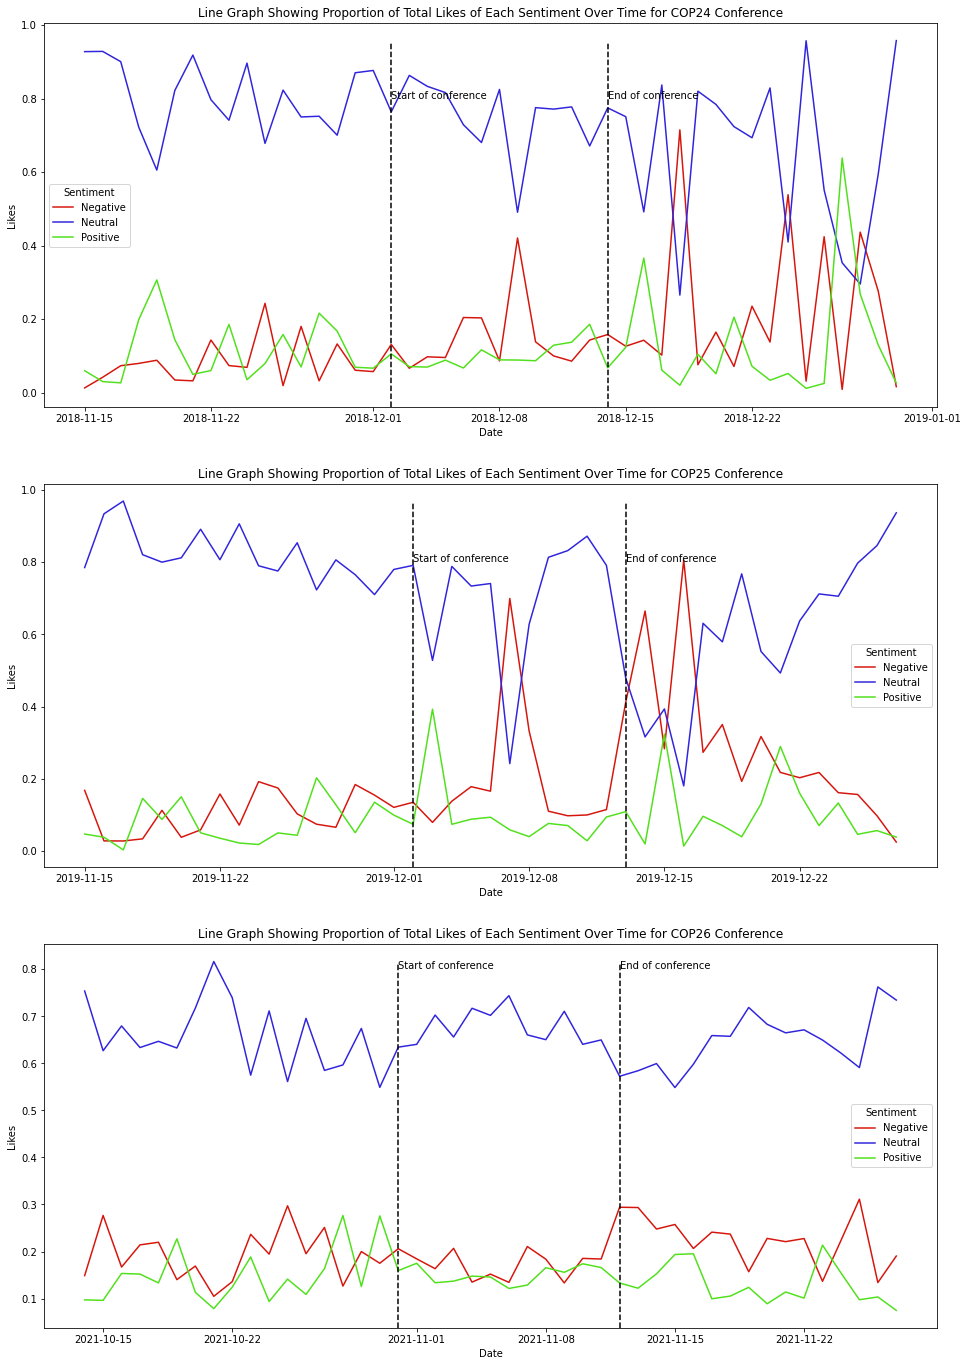

In [ ]:
# Sentiment Likes over time

plt.figure(figsize=(16,24))

for i, df in enumerate([cop24_df, cop25_df, cop26_df]):
    plt.subplot(311+i)
    plt.title("Line Graph Showing Proportion of Total Likes of Each Sentiment Over Time for COP"+str(24+i)+" Conference")
    sentiment_date_likes_df = df.groupby(["Date","Sentiment"])["Likes"].sum().div(df.groupby("Date").sum()["Likes"])
    g = sns.lineplot(data=pd.DataFrame(sentiment_date_likes_df), x="Date", y="Likes", hue="Sentiment", palette=s_pal(0,1,2))
    # Start and end annotations
    plt.axvline(start_end_dates[2*i], 0, 0.95 , color="black", linestyle="--")
    plt.axvline(start_end_dates[2*i+1], 0, 0.95 , color="black", linestyle="--")
    plt.text(start_end_dates[2*i], 0.8, "Start of conference")
    plt.text(start_end_dates[2*i+1], 0.8, "End of conference")
plt.show()

## Averaged Time Series Analysis

We join the separate conference dataframes by their dates, zeroing at the final date of the conference which is Friday in all cases, and thus comparable.

In [12]:
(cop24_df["Date"] - start_end_dates[1].date())

0        -29 days
1        -29 days
2        -29 days
3        -29 days
4        -29 days
           ...   
108400    16 days
108401    16 days
108402    16 days
108403    16 days
108404    16 days
Name: Date, Length: 108405, dtype: timedelta64[ns]

In [13]:
(cop25_df["Date"] - start_end_dates[3].date())

0        -28 days
1        -28 days
2        -28 days
3        -28 days
4        -28 days
           ...   
152657    14 days
152658    14 days
152659    14 days
152660    14 days
152661    14 days
Name: Date, Length: 152662, dtype: timedelta64[ns]

In [14]:
(cop26_df["Date"] - start_end_dates[5].date())

0        -29 days
1        -29 days
2        -29 days
3        -29 days
4        -29 days
           ...   
981977    15 days
981978    15 days
981979    15 days
981980    15 days
981981    15 days
Name: Date, Length: 981982, dtype: timedelta64[ns]

In [15]:
# Create Datasets with encoded dates

cop24_df["Date_Int"] = [x.days for x in cop24_df["Date"] - start_end_dates[1].date()]
cop25_df["Date_Int"] = [x.days for x in cop25_df["Date"] - start_end_dates[3].date()]
cop26_df["Date_Int"] = [x.days for x in cop26_df["Date"] - start_end_dates[5].date()]
date_int_range = list(range(-28,15))
cop24_adj_df = cop24_df[cop24_df["Date_Int"].isin(date_int_range)]
cop25_adj_df = cop25_df[cop25_df["Date_Int"].isin(date_int_range)]
cop26_adj_df = cop26_df[cop26_df["Date_Int"].isin(date_int_range)]

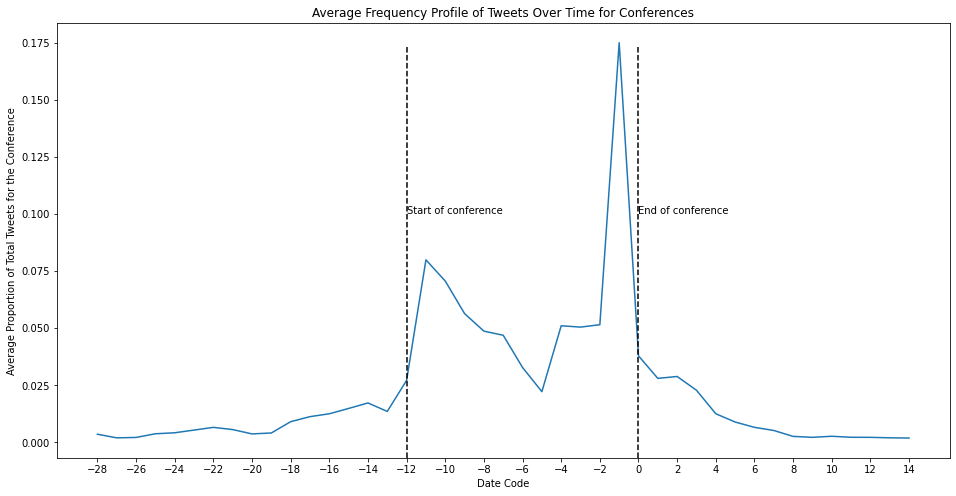

In [16]:
# Frequency

plt.figure(figsize=(16,8))
plt.title("Average Frequency Profile of Tweets Over Time for Conferences")

# Construct Grouped DataFrame
cop24_adj_freq_df = cop24_adj_df.groupby("Date_Int").count()[["ID"]]
cop25_adj_freq_df = cop25_adj_df.groupby("Date_Int").count()[["ID"]]
cop26_adj_freq_df = cop26_adj_df.groupby("Date_Int").count()[["ID"]]
avg_freq_df = (cop24_adj_freq_df/sum(cop24_adj_freq_df["ID"]) + cop25_adj_freq_df/sum(cop25_adj_freq_df["ID"]) + cop26_adj_freq_df/sum(cop26_adj_freq_df["ID"]))/3

g = sns.lineplot(data=avg_freq_df, x="Date_Int", y="ID")
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")
plt.ylabel("Average Proportion of Total Tweets for the Conference")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 0.1, "Start of conference")
plt.text(0, 0.1, "End of conference")

plt.show()

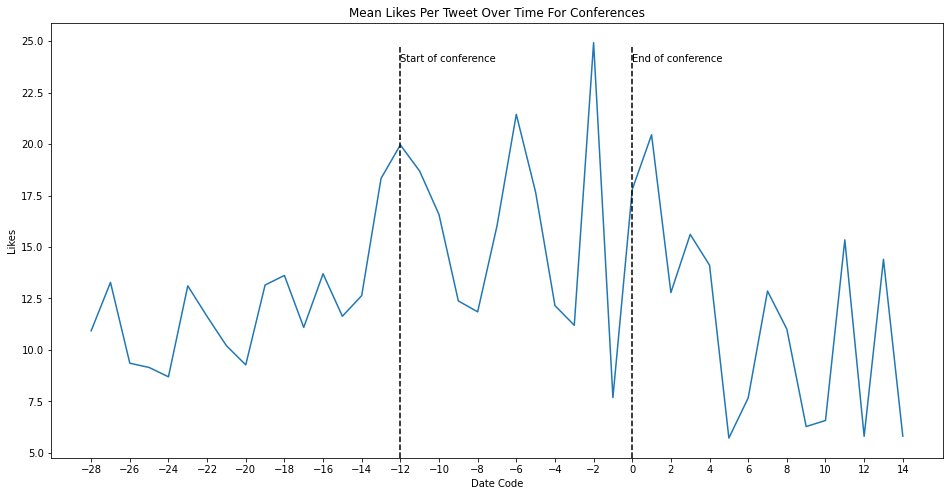

In [25]:
# Likes

plt.figure(figsize=(16,8))
plt.title("Mean Likes Per Tweet Over Time For Conferences")

# Construct Grouped DataFrame
cop24_adj_likes_df = cop24_adj_df.groupby("Date_Int").mean()[["Likes"]]
cop25_adj_likes_df = cop25_adj_df.groupby("Date_Int").mean()[["Likes"]]
cop26_adj_likes_df = cop26_adj_df.groupby("Date_Int").mean()[["Likes"]]
avg_likes_df = (cop24_adj_likes_df + cop25_adj_likes_df + cop26_adj_likes_df)/3
g = sns.lineplot(data=avg_likes_df, x="Date_Int", y="Likes")
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")
plt.ylabel("Likes")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 24, "Start of conference")
plt.text(0, 24, "End of conference")

plt.show()

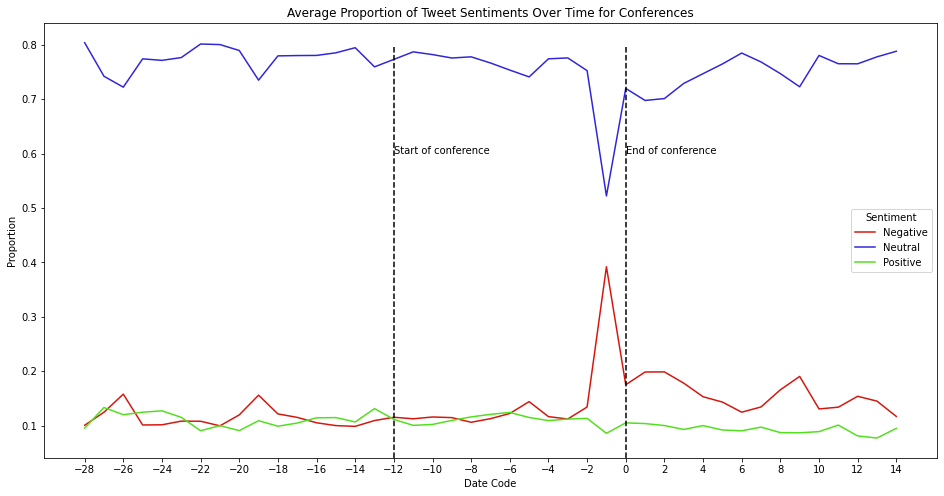

In [18]:
# Frequency, Sentiment

plt.figure(figsize=(16,8))
plt.title("Average Proportion of Tweet Sentiments Over Time for Conferences")

# Construct Grouped DataFrame
cop24_adj_freq_sent_df = cop24_adj_df.groupby(["Date_Int","Sentiment"]).size().unstack(fill_value=0)
cop24_adj_freq_sent_df = cop24_adj_freq_sent_df.div(cop24_adj_freq_sent_df.sum(axis=1), axis=0).reset_index()
cop24_adj_freq_sent_df = cop24_adj_freq_sent_df.melt("Date_Int", var_name="Sentiment", value_name="Proportion").set_index("Sentiment")
cop25_adj_freq_sent_df = cop25_adj_df.groupby(["Date_Int","Sentiment"]).size().unstack(fill_value=0)
cop25_adj_freq_sent_df = cop25_adj_freq_sent_df.div(cop25_adj_freq_sent_df.sum(axis=1), axis=0).reset_index()
cop25_adj_freq_sent_df = cop25_adj_freq_sent_df.melt("Date_Int", var_name="Sentiment", value_name="Proportion").set_index("Sentiment")
cop26_adj_freq_sent_df = cop26_adj_df.groupby(["Date_Int","Sentiment"]).size().unstack(fill_value=0)
cop26_adj_freq_sent_df = cop26_adj_freq_sent_df.div(cop26_adj_freq_sent_df.sum(axis=1), axis=0).reset_index()
cop26_adj_freq_sent_df = cop26_adj_freq_sent_df.melt("Date_Int", var_name="Sentiment", value_name="Proportion").set_index("Sentiment")
avg_freq_sent_df = (cop24_adj_freq_sent_df + cop25_adj_freq_sent_df + cop26_adj_freq_sent_df)/3

g = sns.lineplot(data=avg_freq_sent_df.reset_index(), x="Date_Int", y="Proportion", hue="Sentiment", palette=s_pal(0,1,2))
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 0.6, "Start of conference")
plt.text(0, 0.6, "End of conference")

plt.show()

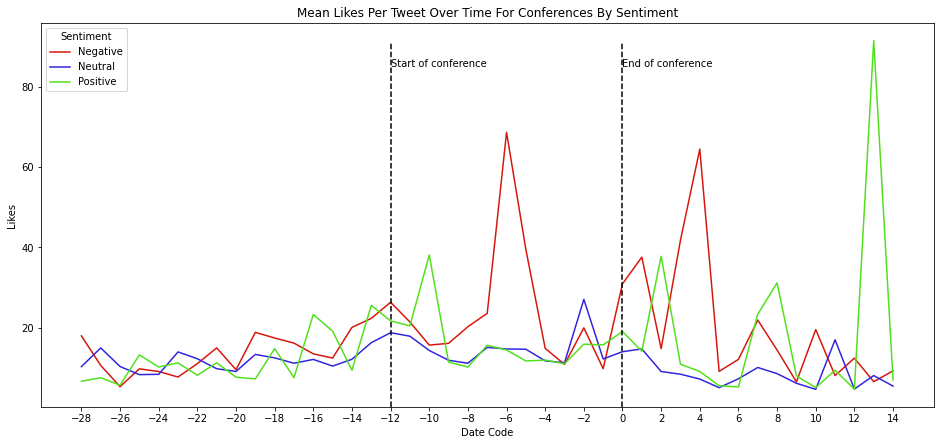

In [26]:
# Likes, Sentiment

plt.figure(figsize=(16,24))

plt.subplot(311)
plt.title("Mean Likes Per Tweet Over Time For Conferences By Sentiment")

# Construct Grouped DataFrame
cop24_adj_likes_sent_df = cop24_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].mean()
cop25_adj_likes_sent_df = cop25_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].mean()
cop26_adj_likes_sent_df = cop26_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].mean()
avg_likes_sent_df = (cop24_adj_likes_sent_df + cop25_adj_likes_sent_df + cop26_adj_likes_sent_df)/3
avg_likes_sent_df = pd.DataFrame(avg_likes_sent_df, columns = ["Likes"]).reset_index()

g = sns.lineplot(data=avg_likes_sent_df.reset_index(), x="Date_Int", y="Likes", hue="Sentiment", palette=s_pal(0,1,2))
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 85, "Start of conference")
plt.text(0, 85, "End of conference")

plt.show()

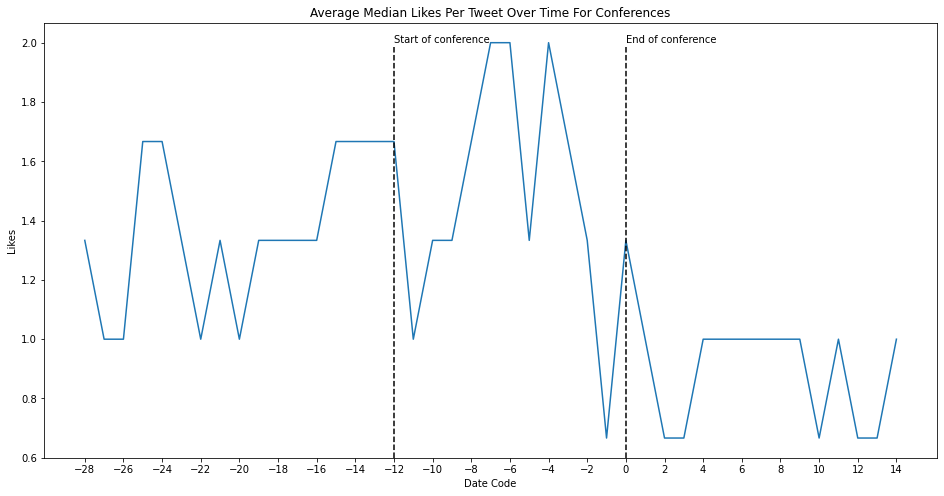

In [30]:
# Median Likes

plt.figure(figsize=(16,8))
plt.title("Average Median Likes Per Tweet Over Time For Conferences")

# Construct Grouped DataFrame
cop24_adj_likes_df = cop24_adj_df.groupby("Date_Int").median()[["Likes"]]
cop25_adj_likes_df = cop25_adj_df.groupby("Date_Int").median()[["Likes"]]
cop26_adj_likes_df = cop26_adj_df.groupby("Date_Int").median()[["Likes"]]
avg_likes_df = (cop24_adj_likes_df + cop25_adj_likes_df + cop26_adj_likes_df)/3
g = sns.lineplot(data=avg_likes_df, x="Date_Int", y="Likes")
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")
plt.ylabel("Likes")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 2, "Start of conference")
plt.text(0, 2, "End of conference")

plt.show()

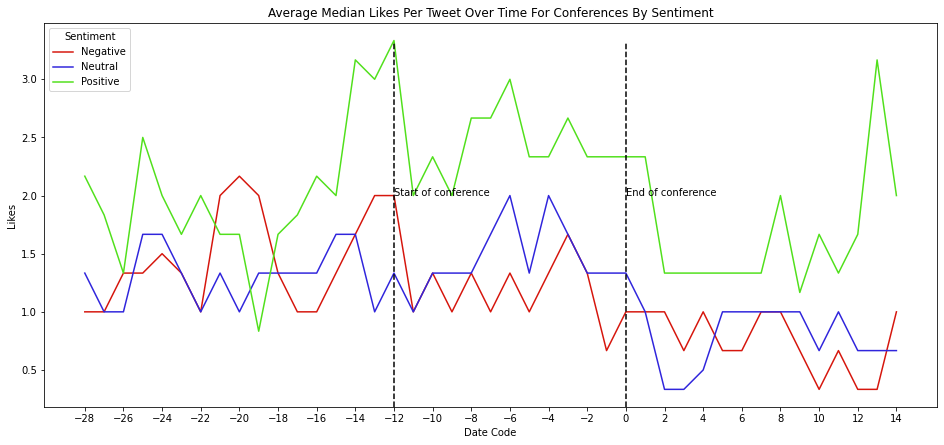

In [31]:
# Likes, Sentiment (Median)

plt.figure(figsize=(16,24))

plt.subplot(311)
plt.title("Average Median Likes Per Tweet Over Time For Conferences By Sentiment")

# Construct Grouped DataFrame
cop24_adj_likes_sent_df = cop24_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].median()
cop25_adj_likes_sent_df = cop25_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].median()
cop26_adj_likes_sent_df = cop26_adj_df.groupby(["Date_Int","Sentiment"])["Likes"].median()
avg_likes_sent_df = (cop24_adj_likes_sent_df + cop25_adj_likes_sent_df + cop26_adj_likes_sent_df)/3
avg_likes_sent_df = pd.DataFrame(avg_likes_sent_df, columns = ["Likes"]).reset_index()

g = sns.lineplot(data=avg_likes_sent_df.reset_index(), x="Date_Int", y="Likes", hue="Sentiment", palette=s_pal(0,1,2))
g.set_xticks(date_int_range[::2])
plt.xlabel("Date Code")

# Start and end annotations
plt.axvline(-12, 0, 0.95 , color="black", linestyle="--")
plt.axvline(0, 0, 0.95 , color="black", linestyle="--")
plt.text(-12, 2, "Start of conference")
plt.text(0, 2, "End of conference")

plt.show()